In [85]:
pip install keras

In [103]:
import keras as ks
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from sklearn.model_selection import cross_val_score

In [88]:
dataset = ks.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

In [89]:
print(train_images.shape)
train_images = train_images / 255.0
print(test_images.shape)
test_images = test_images / 255.0

(60000, 28, 28)
(10000, 28, 28)


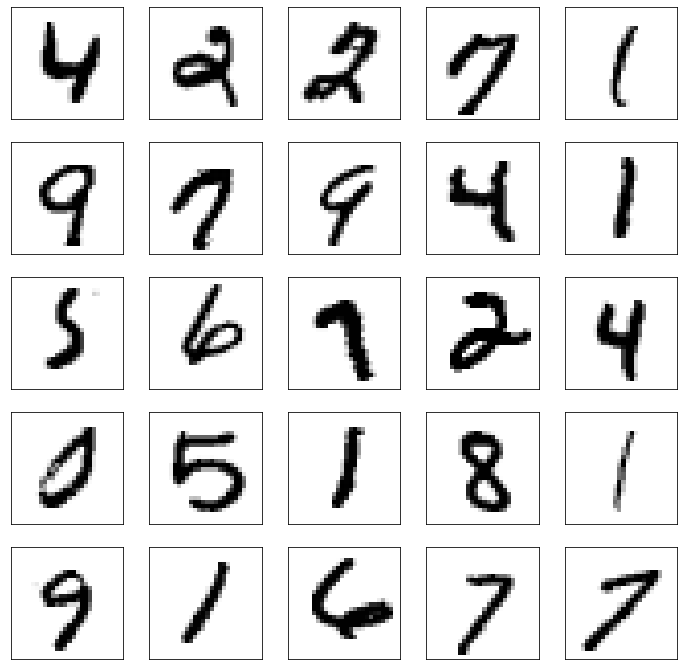

In [90]:
#Примеры тренировочных данных в датасете.
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[np.random.randint(0, len(train_images))], cmap=plt.cm.binary)
plt.show()

In [115]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

categorical_train = keras.utils.to_categorical(y_train, 10)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2), Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2), Flatten(), Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

numbers_recognition = model.fit(x_train, categorical_train, batch_size=32, epochs=5, validation_split=0.15)

Epoch 1/5
1594/1594 [==============================] - 60s 38ms/step - loss: 0.2856 - accuracy: 0.9514 - val_loss: 0.0757 - val_accuracy: 0.9788
Epoch 2/5
1594/1594 [==============================] - 60s 38ms/step - loss: 0.0568 - accuracy: 0.9827 - val_loss: 0.0874 - val_accuracy: 0.9742
Epoch 3/5
1594/1594 [==============================] - 60s 38ms/step - loss: 0.0449 - accuracy: 0.9861 - val_loss: 0.0579 - val_accuracy: 0.9846
Epoch 4/5
1594/1594 [==============================] - 60s 38ms/step - loss: 0.0370 - accuracy: 0.9889 - val_loss: 0.0663 - val_accuracy: 0.9852
Epoch 5/5
1594/1594 [==============================] - 60s 38ms/step - loss: 0.0343 - accuracy: 0.9898 - val_loss: 0.0557 - val_accuracy: 0.9869
